## Random Walks and the Central Limit Theorem

Kyle P. Rasku MS RN BSN

In [1]:
import numpy
import pandas
import random

In [2]:
def random_walk(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
    return x, y


### The most basic Discrete Stochastic Process: a fair Random Walk

We can take some arbitrarily large number of "walks" (equivalent to drawing a large # of samples) of n "steps" (size n) where:

1. n is a discrete, randomly-chosen coordinate adjustment from the default 'choices' list, defined above in the random walk function
2. each possible n has a 25% chance of being chosen
3. we assume that each "step" takes place at a discrete time-point, equivalent to the # of the steps, 0 - n

### This process creates a sampling distribution of sample means

1. The samples are the walks having n steps
2. The samples means are the mean distances traveled from the origin during each walk of n steps
3. The number of times we sample is the total number of walks (generally, a very large number)

### The sampling distribution of the sample mean follows the Central Limit Theorem (CLT)

The population does not need to be normally distributed, but as long as the sample size (n) > 30, the sampling distribution of the sample means will approximate a normal distribution.

In [3]:
# Try walking 100 fair steps, 10,000 times
num_walks = 10000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 100 steps will be run.


In [4]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

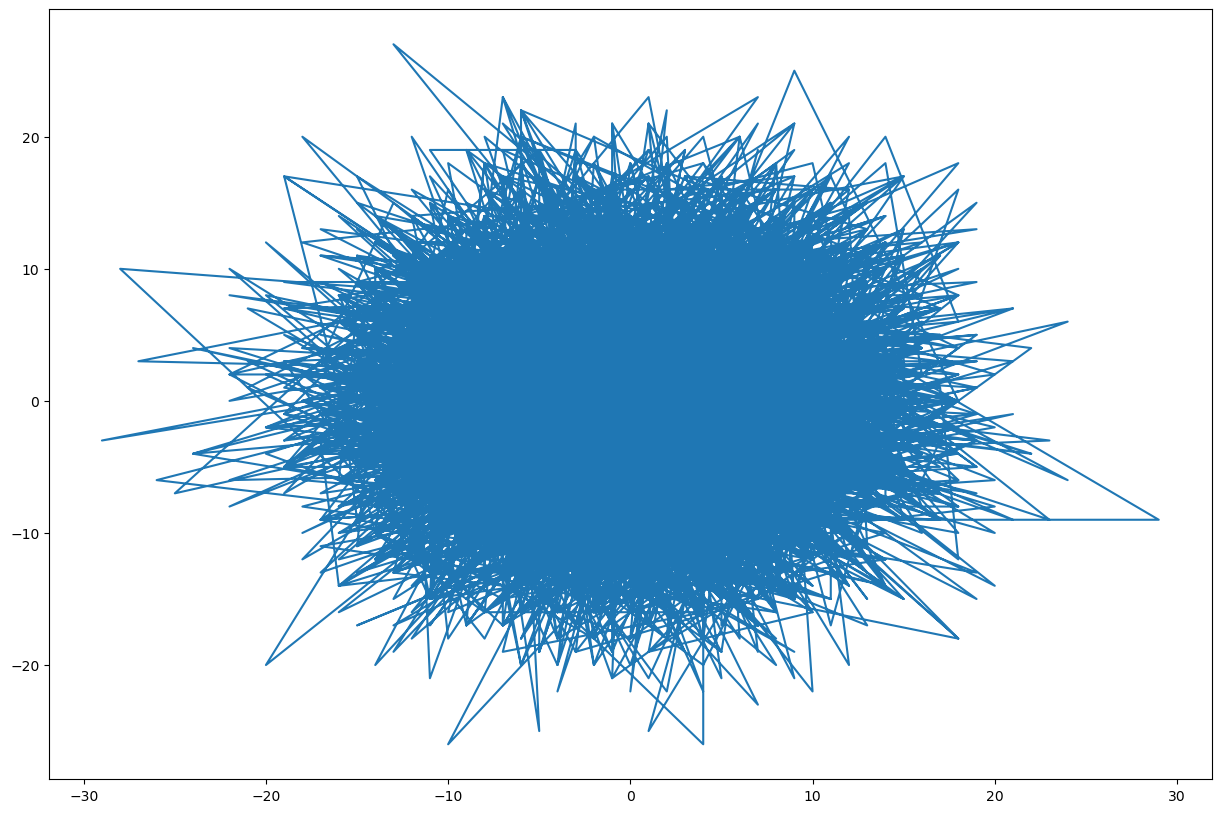

In [5]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

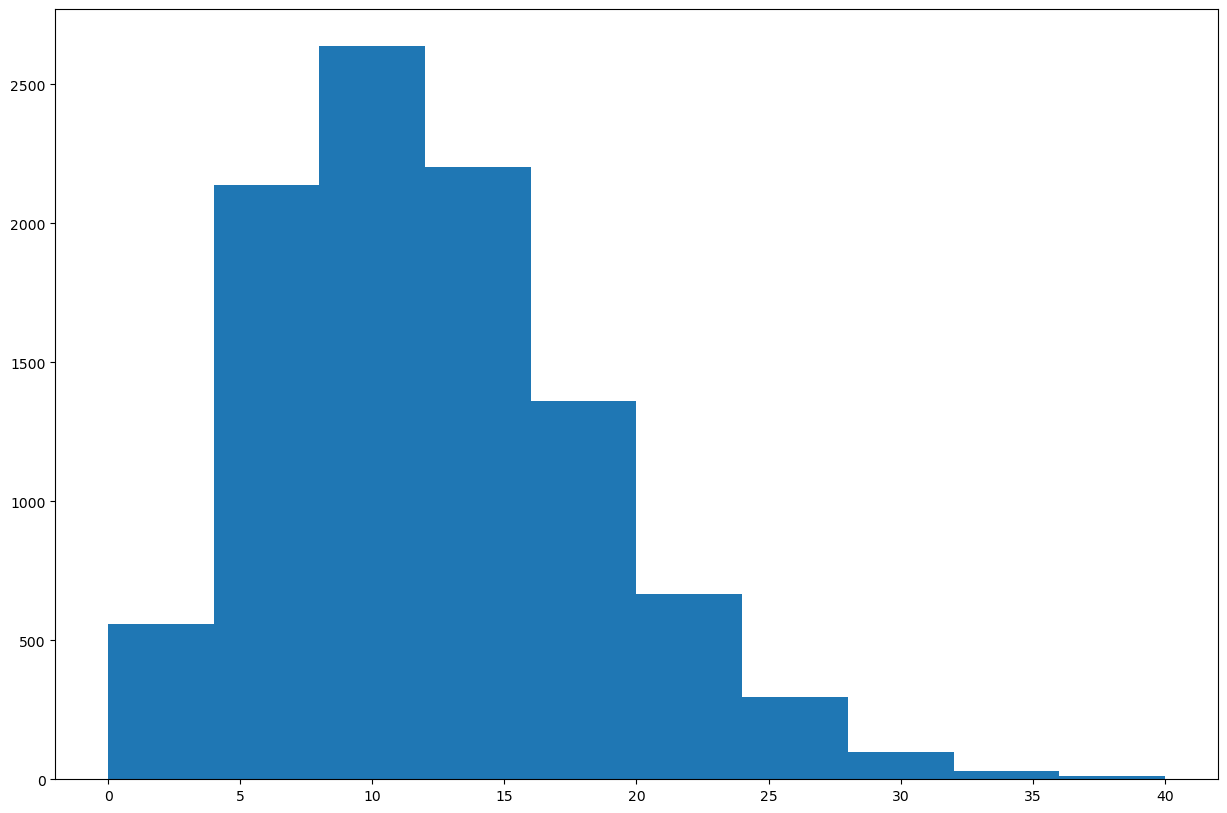

In [6]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [7]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean        -0.069800
std          7.020104
min        -29.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         29.000000
dtype: float64

In [8]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean         0.005000
std          7.089965
min        -26.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         27.000000
dtype: float64

In [9]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        11.249800
std          6.054987
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         40.000000
dtype: float64

In [10]:
print("The mean distance walked is", stats[1])

The mean distance walked is 11.2498


In [11]:
print("The variance is", stats[2]**2)

The variance is 36.662866246626464


In [12]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 30.684453103922692 % of the variance.


In [13]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 17.30478689070641


In [14]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 5.194813109293592


In [15]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 1.2498000000000005


### An Unfair Random Walk

In [16]:
# An unfair walk, where one or more directions are favored or penalized.
num_walks = 10000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 100 steps will be run.


In [17]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    # weighting the walk-choices, so walking N (increasing Y) will be favored, and walking S (decreasing Y) will be penalized
    # try plugging in a variety of "unfair" weights and see how the statistical summaries change
    end_coords = random_walk(steps_per_walk, [(0, 1.5), (0, -0.5), (1, 0), (-1, 0)])
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

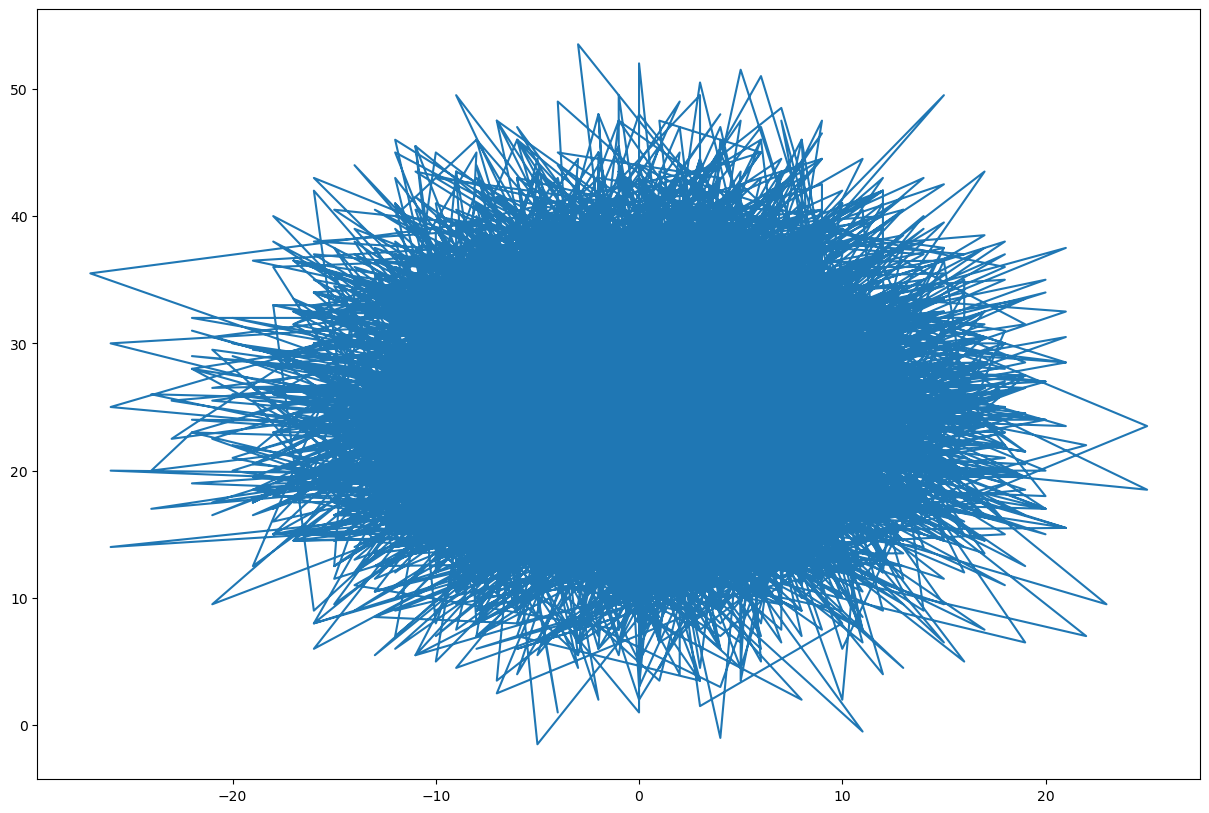

In [18]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

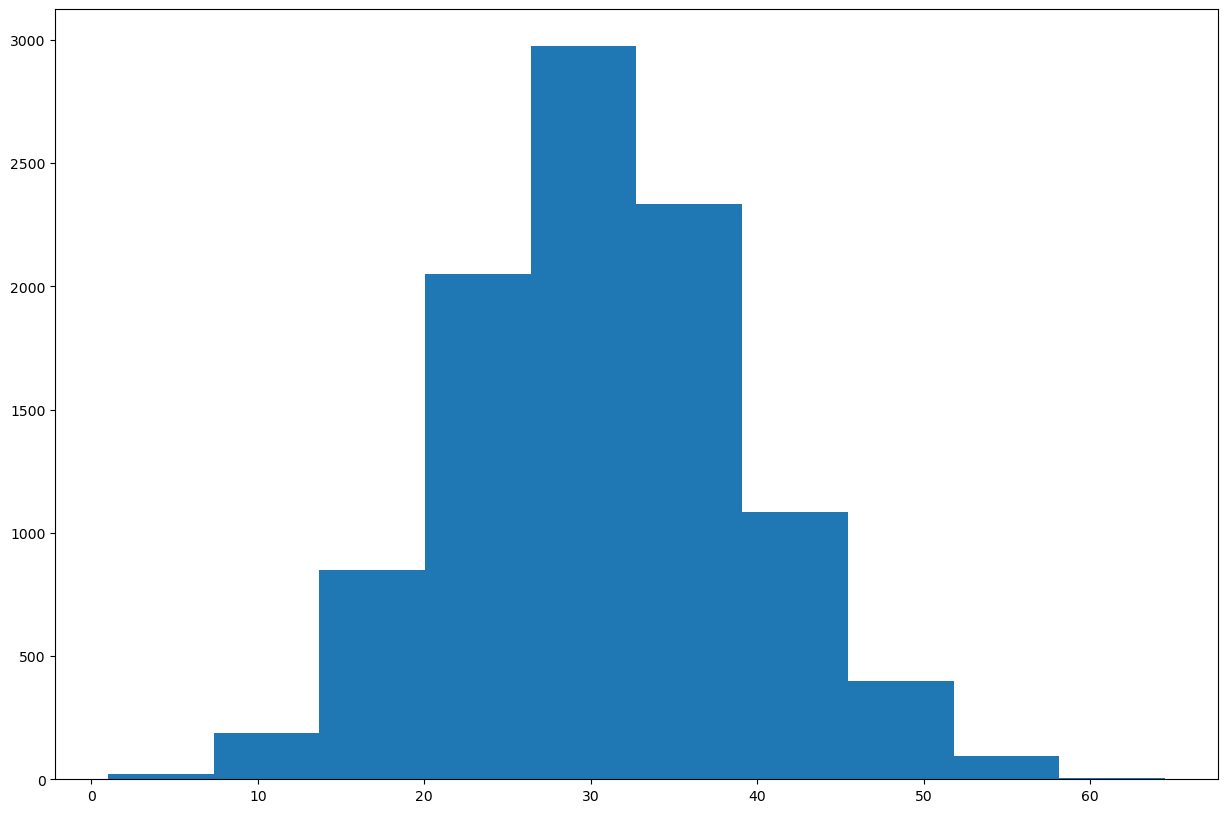

In [19]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [20]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean         0.107600
std          7.076908
min        -27.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         25.000000
dtype: float64

In [21]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean        25.059200
std          7.483568
min         -1.500000
25%         20.000000
50%         25.000000
75%         30.000000
max         53.500000
dtype: float64

In [22]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        30.694800
std          8.545669
min          1.000000
25%         25.000000
50%         30.500000
75%         36.500000
max         64.500000
dtype: float64

In [23]:
print("The mean distance walked is", stats[1])

The mean distance walked is 30.6948


In [24]:
print("The variance is", stats[2]**2)

The variance is 73.028455805581


In [25]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 42.03128720360294 % of the variance.


In [26]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 39.240468833133015


In [27]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 22.149131166866987


In [28]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 0.19480000000000075


The same number of walks with the same number of steps - but when N is favored over S by .1, the variance increases by 7.2.

When N is favored over S by .5, and S is dis-favored by an additional .5, the variance then increases by 38 - it doubles. And when N is favored over S by 1.5, and S is dis-favored likewise, variance increases again by 71.

Note the change in the y-axis range in the plot of the fair walk vs. the unfair walk. The range of the fair walk is about equal in every direction, while the range of the unfair walk predictably positively-skews along the y-axis.

Try this for yourself with different variations and demonstrate probability on your own!

## Adding Wormholes

Not only do small changes in bias impact the measures and skew of many real world probabilities and outcomes, but randomness plays an additional part in modifying trajectories that might otherwise seem more predictable.

In the fair random walk, the mean and variance were pretty constant.  While we couldn't predict exactly where any individual walk would travel, overall we could easily calculate the predicted range of many walks with high probability.  It doesn't matter if the walk is fair or biased - if we sample enough walks, they will be normally distributed, and this quality is robust, even when we add randomness, or cut down on the sample size of the walk / number of steps.

**But what happens when we add "wormholes" to a fair random walk?  Will the CLT hold?  For how long?**

Lets make a list of coordinates that, when travelled to, teleport the walker to another random location on the walk.  We can begin with one, then add another, and then another and see how these "random acts" change our analysis of a random walk in 2 dimensions. We can make the impact more marked by adding some distance to the newly generated mapping points as well!

In [56]:

def random_walk_with_wormholes(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):

    # create wormholes that will teleport you somewhere else
    #
    # these wormholes must be within mean distance of the starting point
    # or they are very unlikely to be hit any time during the walk
    # when the walk is 30, the mean walk is 6.3
    # when the walk is 100, the mean walk is about 11...so
    # pretty safe to use the square root of n as the range of wormholes :)
    w = int(n/4)
    r = int(numpy.sqrt(n))+1
    wormholes = []
    print("Creating ", w, " wormholes for a sample of size ", n)
    for j in range(w):
        w_x = random.randint(-r, r)
        w_y = random.randint(-r, r)
        wormholes.append((w_x, w_y))

    #print("The wormholes are", wormholes, "for a grid", n/2, "by", n/2, "where sqrt(n) is", r)

    x, y = 0, 0
    for i in range(n):
        # take a step
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
        #print("The new coordinates are", x, ",", y)
        # check to see if a wormhole was hit
        if (x, y) in wormholes:
            #print("You hit a wormhole!")
            # teleport somewhere else by generating two random numbers between 0 and n...
            x = random.randint(-n/2,n/2)
            y = random.randint(-n/2,n/2)
            #print("You have been teleported to", x, ",", y)

    return x, y


In [57]:
num_walks = 1000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

1000 simulations of 100 steps will be run.


In [58]:
distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk_with_wormholes(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])


Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100
Creating  25  wormholes for a sample of size  100


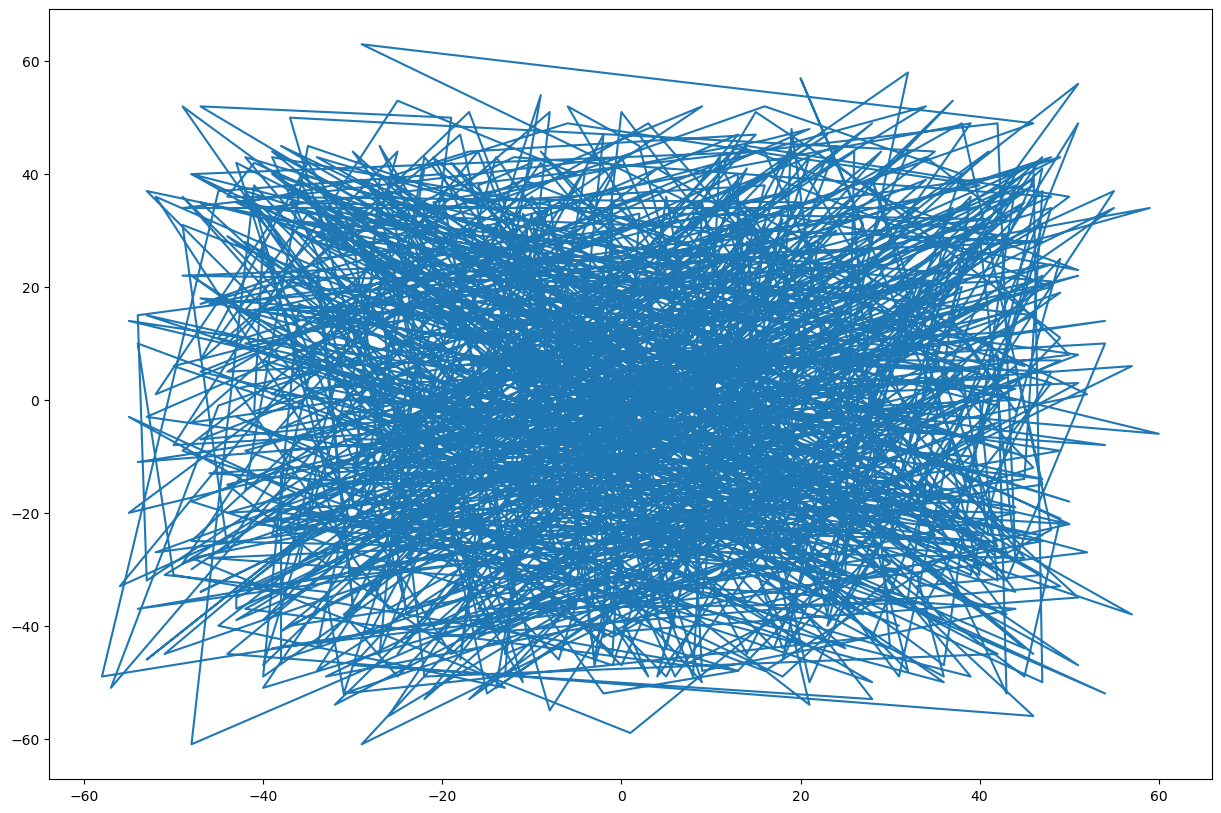

In [59]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

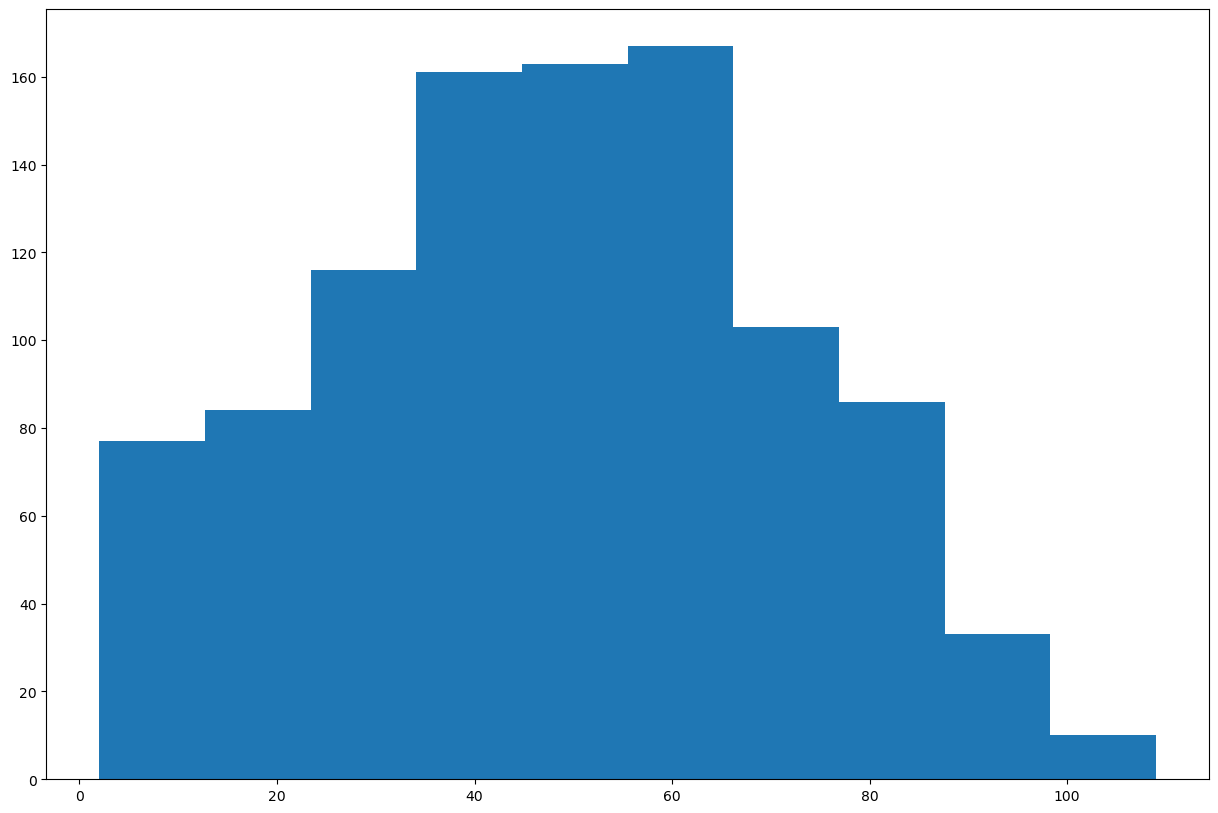

In [60]:
f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

### Characterizing the Process that Leads to Chaos / Denormalization

1. The **fewer** wormholes there are, the more drastically the distribution strays from normal. Generating 1/2 wormholes makes wormholes the "new normal", so there needs to be a maximum of 25 wormholes for every 100 walks for the distribution to denormalize.
2. And, the wormholes **must be within the range sqrt(n)**, as an approximation of mean distance traveled - otherwise they are very unlikely to be hit, and the walk will function like the fair random walk.
3. The "teleportation" mechanism must also possibly move the walker **more than mean distance away** from their current coordinates

If we meet these criteria, the wormhole experiment will produce an outcome that will successfully DENORMALIZE the distribution of the distances. 

In [61]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    1000.000000
mean        1.312000
std        28.873072
min       -58.000000
25%       -22.000000
50%         2.000000
75%        24.000000
max        60.000000
dtype: float64

In [62]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    1000.000000
mean       -0.423000
std        28.608434
min       -61.000000
25%       -23.000000
50%        -0.500000
75%        22.000000
max        63.000000
dtype: float64

In [63]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    1000.000000
mean       48.509000
std        23.071502
min         2.000000
25%        32.750000
50%        49.000000
75%        65.000000
max       109.000000
dtype: float64

In [64]:
print("The mean distance walked is", stats[1])

The mean distance walked is 48.509


In [65]:
print("The variance is", stats[2]**2)

The variance is 532.2942132132131


In [66]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 71.58050218805037


In [67]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 25.43749781194963


In [68]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is -0.49099999999999966


## Wormholes, Robustness & The 'Breakdown Point'

The process of adding wormholes to distrupt the 'normalness' of the distribution created by the random walk is similar to the process of identifying the 'Breakdown Point'.

The robustness of a statistic is related to how many data points in a sample you can replace with an artificial outlier before that statistic becomes a poor estimate. The 'breakdown point' is the maximum percentage of observations you can replace with outliers before causing unbounded changes in the estimate.  

It took many wormholes before the distribution caused by the random walk / CLT began to denormalize.  The CLT's high 'breakdown point' is a testament to its robustness.

Typically, the median and IQR are considered the most robust; you would have to change many values in a data set before you see these values begin to change.  On the other hand, you can usually significantly change the value of the mean or standard deviation by changing even one value drastically enough.  

Reference: https://statisticsbyjim.com/basics/robust-statistics/